In [34]:
from src.visualisation import PatientSnapshot
import numpy as np
import sympy
import vg
from sympy import Plane, Point3D
from pandas import DataFrame
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation


In [11]:
patient_path = '../data/1'
patient = PatientSnapshot.from_path(patient_path, mask_path=None)

In [12]:
import yaml
from yaml import Loader

def load_center_line(path):
    """
    :param: path: path to the parsable center line
    """
    with open(path) as f:
        cl = yaml.load(f, Loader)
    
    return cl

In [13]:
cl_left = load_center_line('../data/5/curveLeftParsedCorrected')
cl_right = load_center_line('../data/5/curveRightParsedCorrected')

In [14]:
coords_left = [('left', int(float(endpoint['endpoint']['x'])), int(float(endpoint['endpoint']['y'])), int(float(endpoint['endpoint']['z']))) for endpoint in cl_left['segments']]
coords_right = [('right', int(float(endpoint['endpoint']['x'])), int(float(endpoint['endpoint']['y'])), int(float(endpoint['endpoint']['z']))) for endpoint in cl_right['segments']]

coords_left = DataFrame(coords_left, columns=['side', 'x', 'y', 'z'])
coords_right = DataFrame(coords_right, columns=['side', 'x', 'y', 'z'])

coords = coords_left.append(coords_right)

In [32]:
coords = DataFrame(coords)
fig = px.line_3d(coords, x='x', y='y', z='z', color='side')

# fig.show()

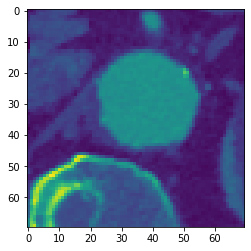

In [23]:
plt.imshow(patient.snapshot[-200][250:320, 250:320])
point_1 = (-200, 280, 290)

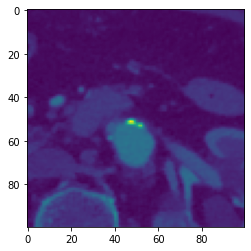

In [24]:
plt.imshow(patient.snapshot[-250][200:300, 250:350])
point_2 = (-250, 260, 300)

In [25]:
line = (point_1, point_2)
vector = tuple(point_2[i] - point_1[i] for i in range(len(point_1)))
vector

(-50, -20, 10)

In [26]:
patient_plane = patient.snapshot[1518]
plane = Plane(
    Point3D(1518, 0, 0), 
    Point3D(1518, patient_plane.shape[0]//2, patient_plane.shape[1]-1),
    Point3D(1518, patient_plane.shape[1]-1, patient_plane.shape[0]//2)
)
plane_normal = plane.normal_vector
plane_normal

(-195585, 0, 0)

In [27]:
print(vector)
print(plane_normal)

(-50, -20, 10)
(-195585, 0, 0)


In [30]:
vector = np.array([float(i) for i in vector])
plane_normal = np.array([float(i) for i in plane_normal])
vg.angle(vector, plane_normal, look=vg.basis.z)

21.80140948635181

In [31]:
z_angle = vg.angle(vector, plane_normal, look=vg.basis.z)
y_angle = vg.angle(vector, plane_normal, look=vg.basis.y)

In [35]:
r = Rotation.from_euler('zyx', np.array([z_angle,y_angle,0]), degrees=True)
offset = np.array([-265,255,255])
# patient.diagonal_plot(offset, r)